In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
x=data.drop('output',axis=1)
y=data['output']


In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf=RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True) # oob score - test accuracy avg

rf.fit(x_train,y_train)
# checking the obb score
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [9]:
obb_score=rf.oob_score_
print(f'Out-of-Bag(oob) score: {obb_score}')

Out-of-Bag(oob) score: 0.8018867924528302


### Hyperparameter tuning for random forest using GridsearchCV and fie the data

In [ ]:
rf=RandomForestClassifier(random_state=42, n_jobs=-1)
params={
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[5,10,15,20,25],
    'n_estimators':[10,20,30,40,50]
}
from sklearn.model_selection import GridSearchCV

#instantiate the grid serach model
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


In [ ]:
grid_search.best_score_

In [27]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=40,
                       n_jobs=-1, random_state=42)

[Text(0.4444444444444444, 0.9166666666666666, 'cp <= 0.5\ngini = 0.492\nsamples = 130\nvalue = [93, 119]\nclass = No Disease'),
 Text(0.2222222222222222, 0.75, 'thalachh <= 121.0\ngini = 0.375\nsamples = 60\nvalue = [72, 24]\nclass = Disease'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 13\nvalue = [19, 0]\nclass = Disease'),
 Text(0.3333333333333333, 0.5833333333333334, 'age <= 59.5\ngini = 0.429\nsamples = 47\nvalue = [53, 24]\nclass = Disease'),
 Text(0.2222222222222222, 0.4166666666666667, 'thall <= 2.5\ngini = 0.456\nsamples = 32\nvalue = [35, 19]\nclass = Disease'),
 Text(0.1111111111111111, 0.25, 'gini = 0.397\nsamples = 14\nvalue = [6, 16]\nclass = No Disease'),
 Text(0.3333333333333333, 0.25, 'gini = 0.17\nsamples = 18\nvalue = [29, 3]\nclass = Disease'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.34\nsamples = 15\nvalue = [18, 5]\nclass = Disease'),
 Text(0.6666666666666666, 0.75, 'thalachh <= 150.5\ngini = 0.297\nsamples = 70\nvalue = [

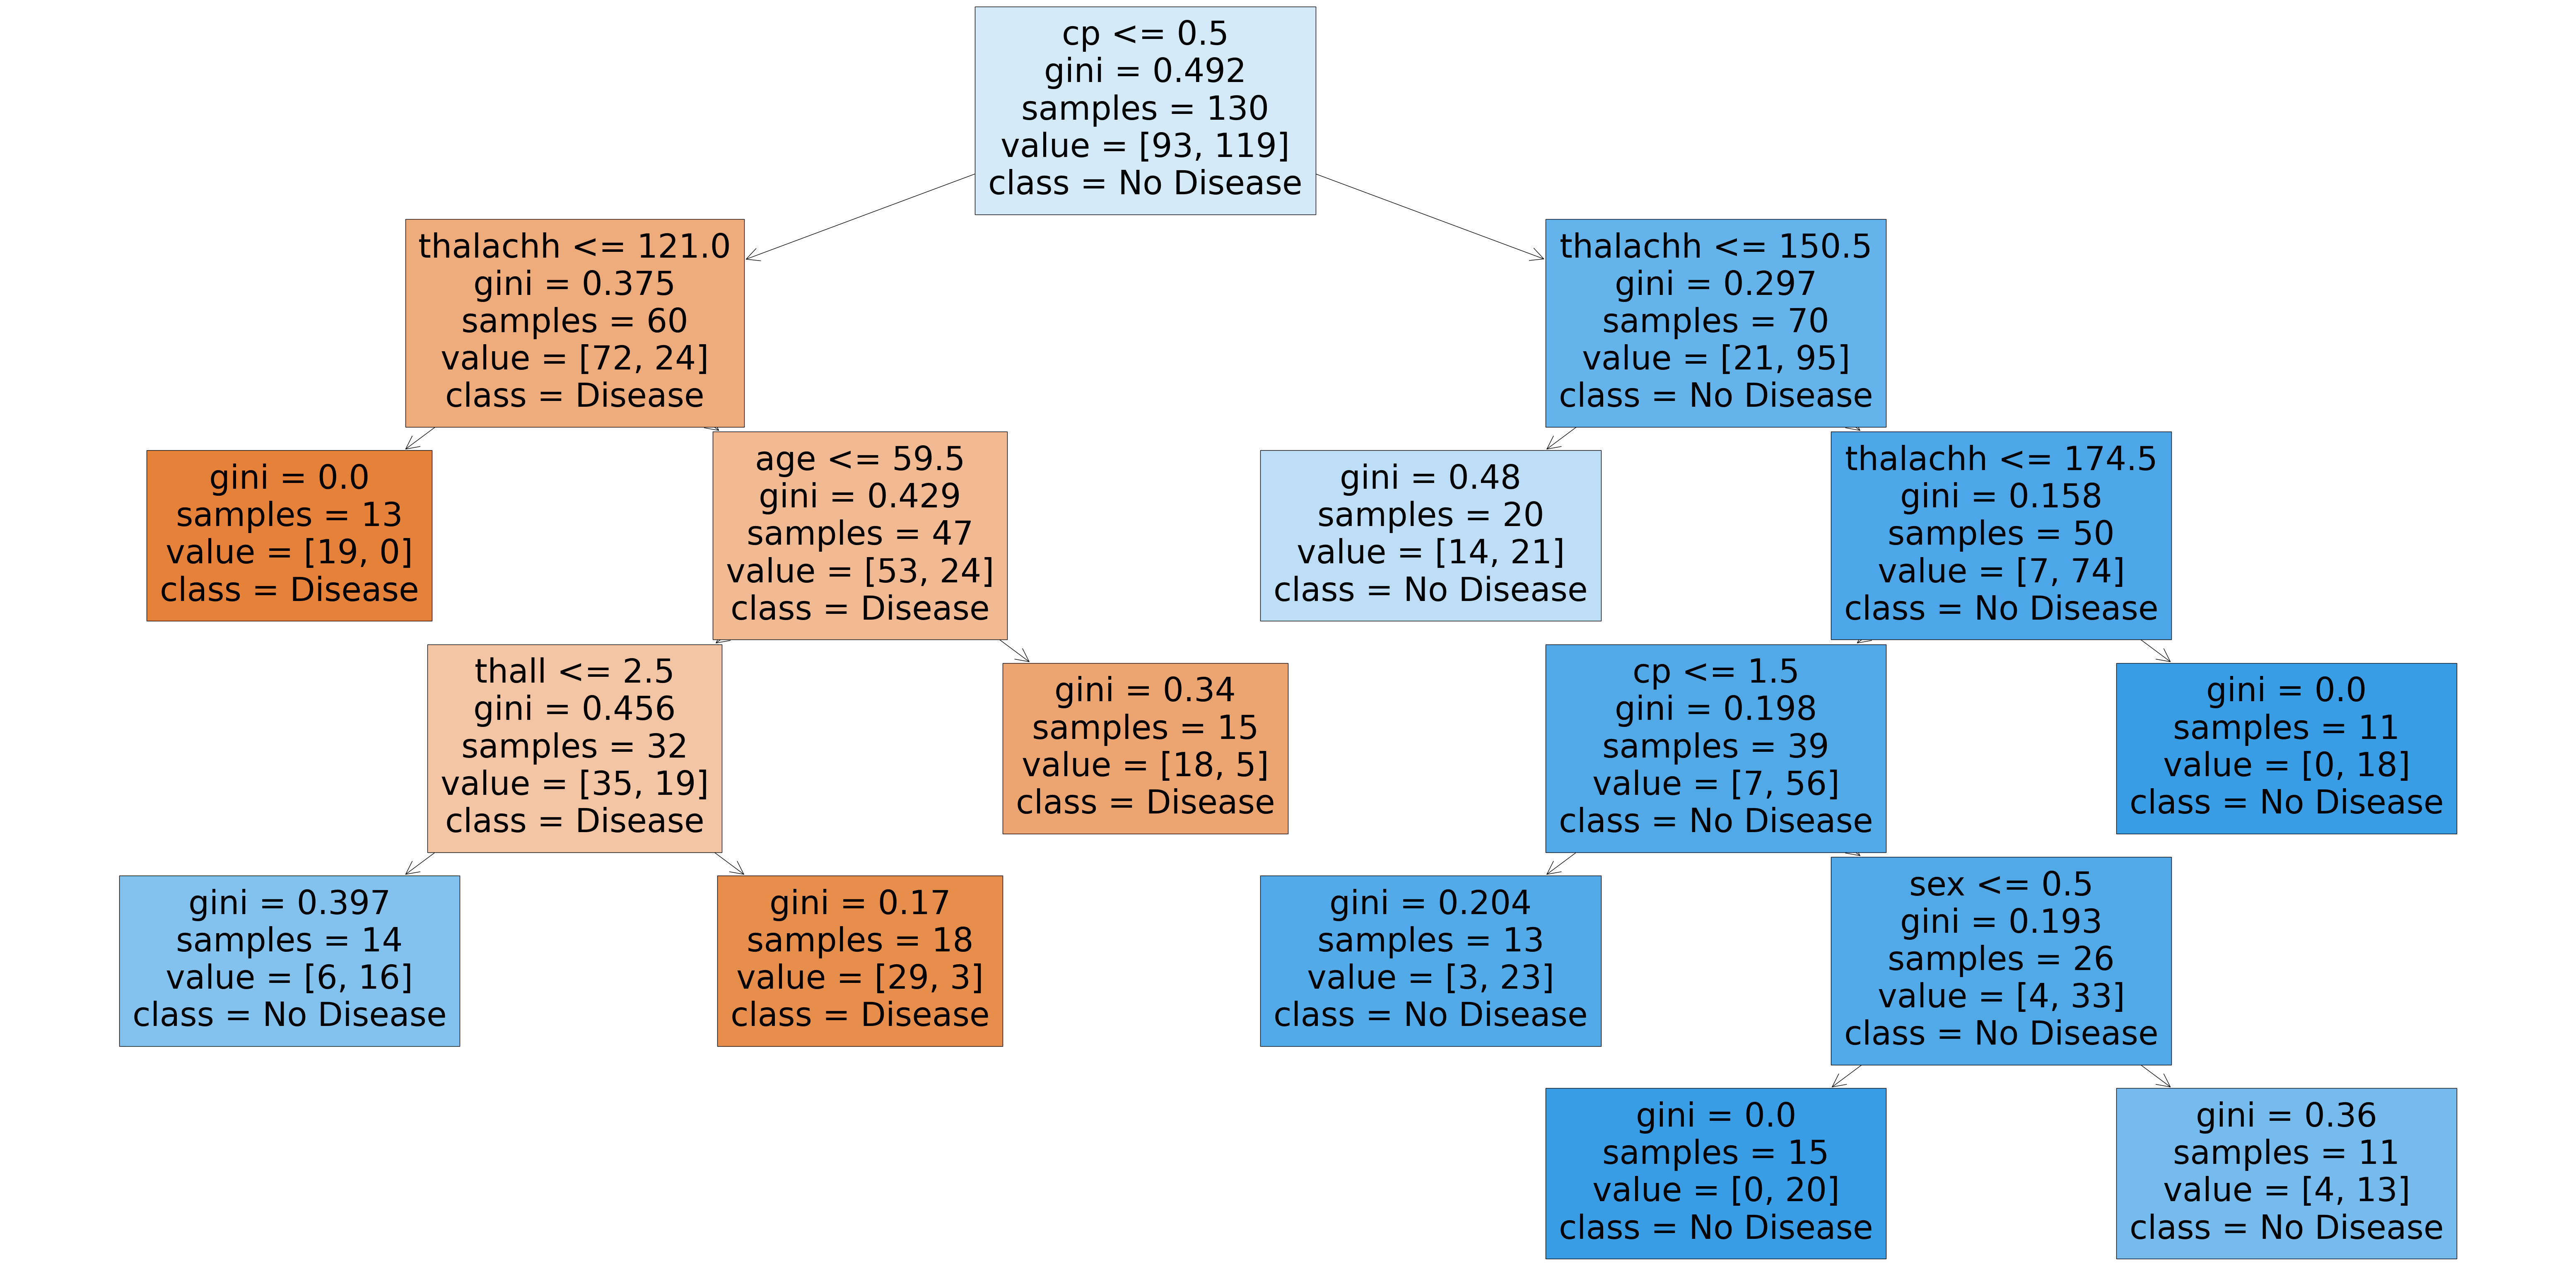

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=x.columns.tolist(),class_names=['Disease','No Disease'],filled=True)

[Text(0.4605263157894737, 0.9, 'sex <= 0.5\ngini = 0.5\nsamples = 139\nvalue = [109, 103]\nclass = Disease'),
 Text(0.21052631578947367, 0.7, 'thalachh <= 147.0\ngini = 0.396\nsamples = 49\nvalue = [19, 51]\nclass = No Disease'),
 Text(0.10526315789473684, 0.5, 'chol <= 248.5\ngini = 0.498\nsamples = 21\nvalue = [16, 14]\nclass = Disease'),
 Text(0.05263157894736842, 0.3, 'gini = 0.473\nsamples = 10\nvalue = [5, 8]\nclass = No Disease'),
 Text(0.15789473684210525, 0.3, 'gini = 0.457\nsamples = 11\nvalue = [11, 6]\nclass = Disease'),
 Text(0.3157894736842105, 0.5, 'thalachh <= 169.5\ngini = 0.139\nsamples = 28\nvalue = [3, 37]\nclass = No Disease'),
 Text(0.2631578947368421, 0.3, 'gini = 0.227\nsamples = 17\nvalue = [3, 20]\nclass = No Disease'),
 Text(0.3684210526315789, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 17]\nclass = No Disease'),
 Text(0.7105263157894737, 0.7, 'thall <= 2.5\ngini = 0.464\nsamples = 90\nvalue = [90, 52]\nclass = Disease'),
 Text(0.5789473684210527, 0.5, 'caa 

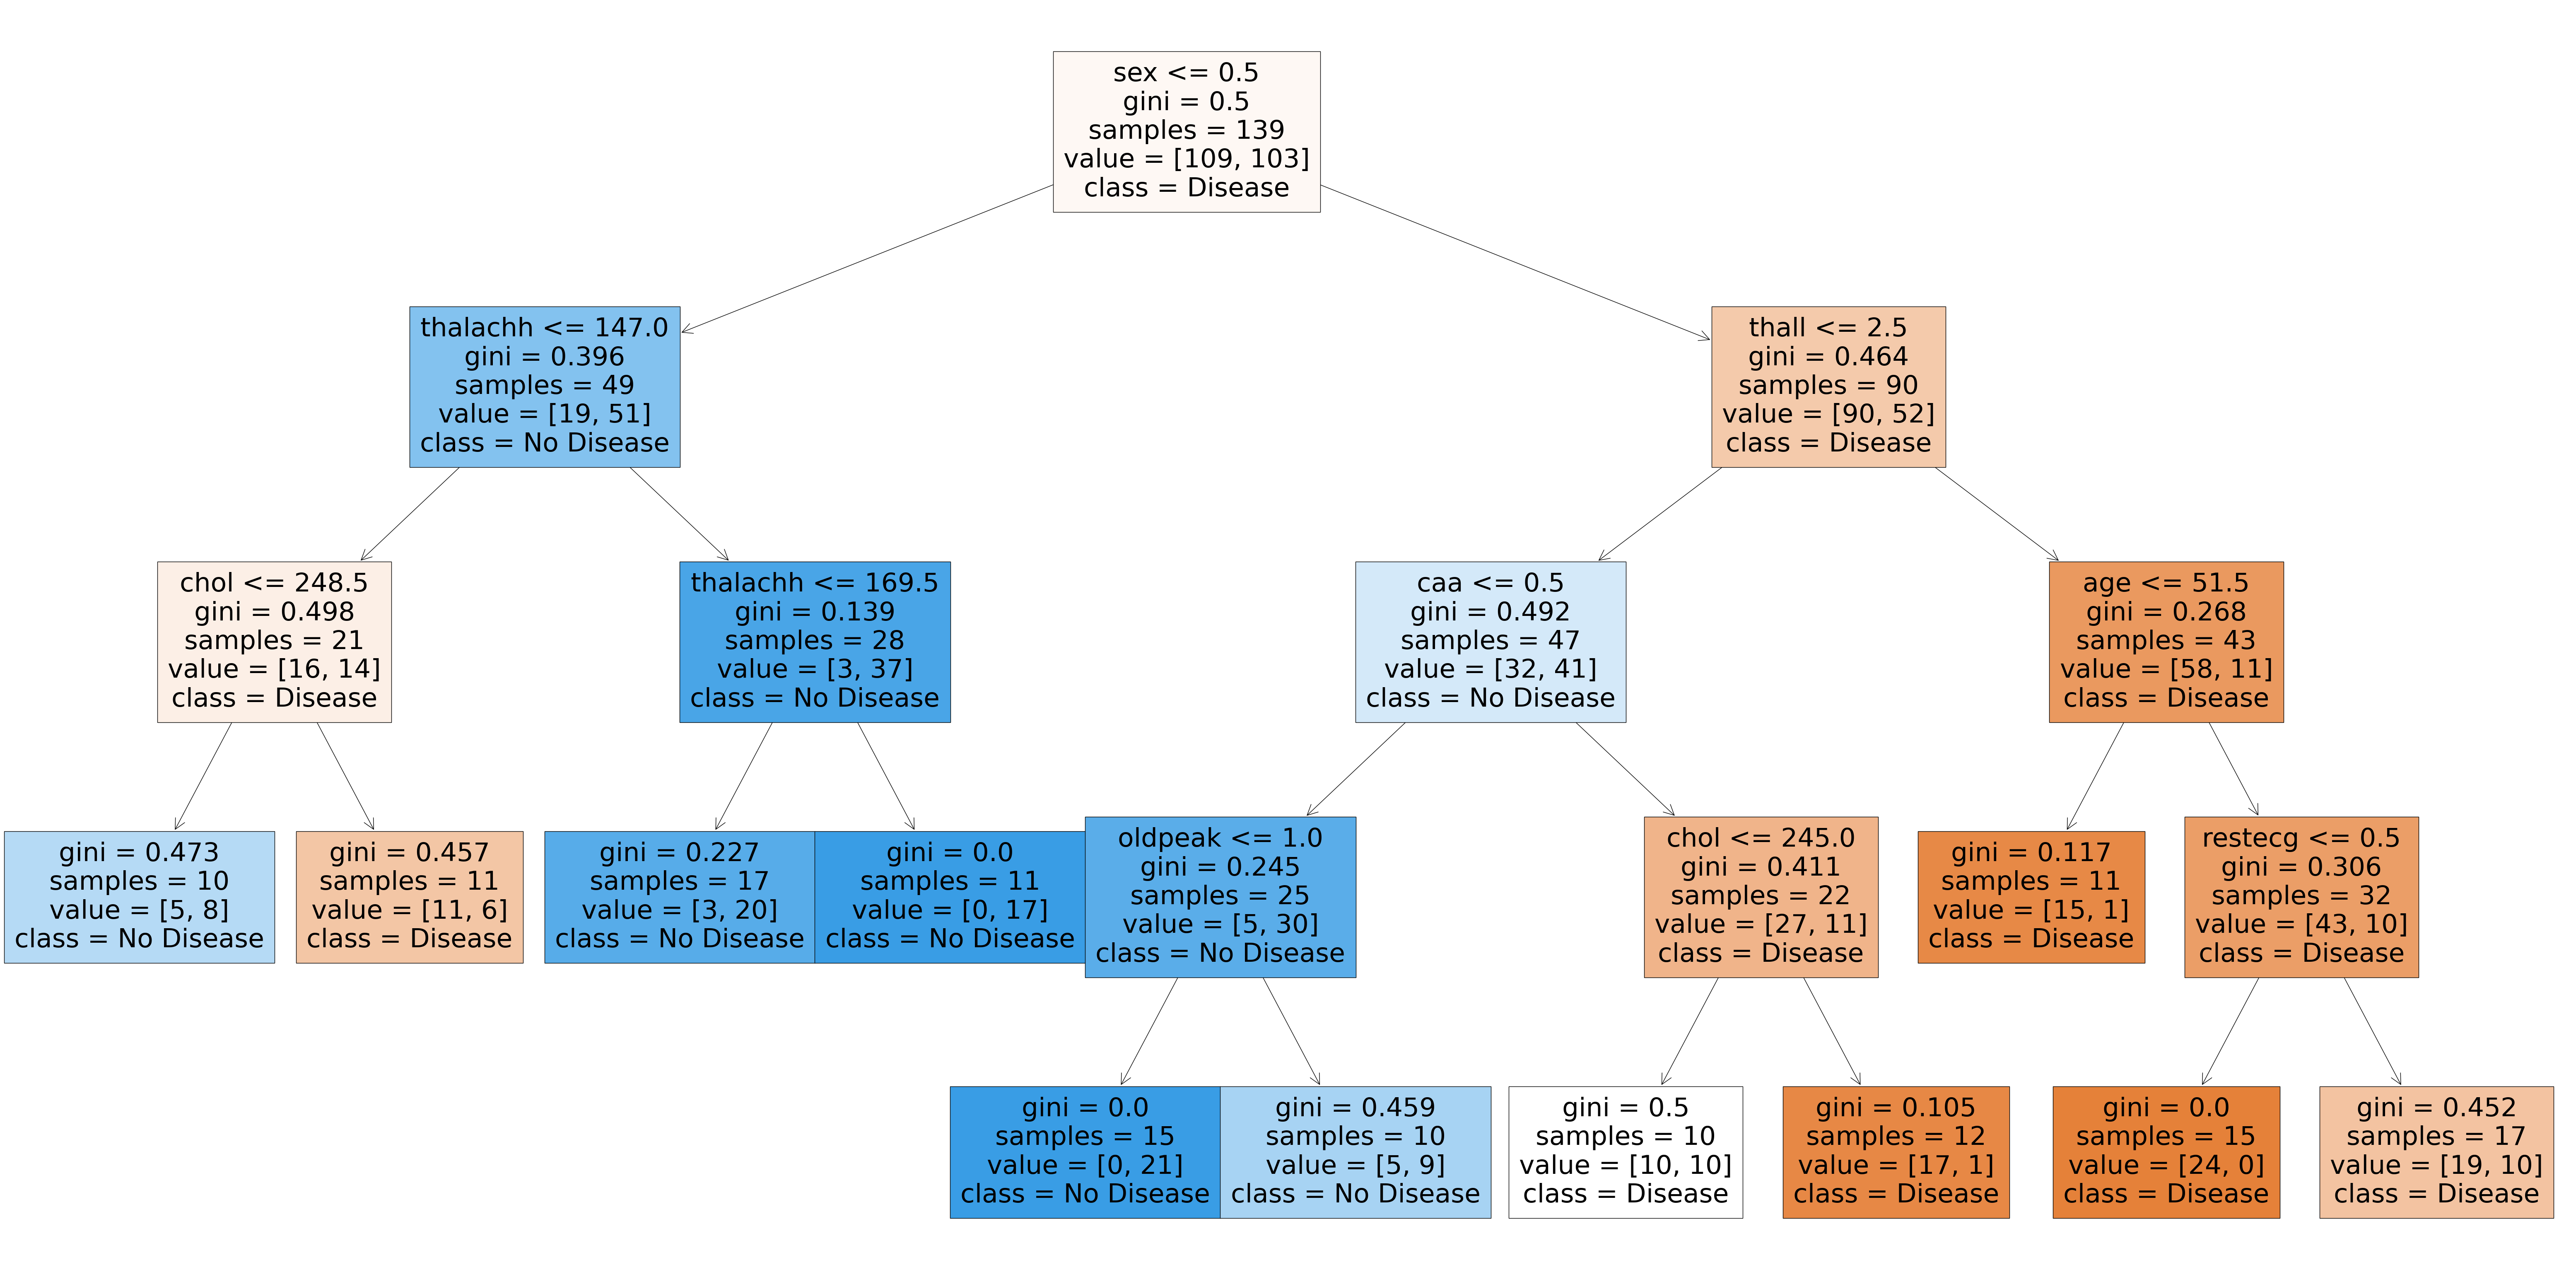

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],feature_names=x.columns.tolist(),class_names=['Disease','No Disease'],filled=True)

## Sort the data with the help of feature importance

In [34]:
rf_best.feature_importances_

array([0.04611542, 0.04291474, 0.19054803, 0.01436054, 0.02419767,
       0.        , 0.01145317, 0.10825587, 0.12812751, 0.08959073,
       0.0547914 , 0.15213696, 0.13750797])

In [35]:
imp_df=pd.DataFrame({
    'Varname':x_train.columns,
    'imp':rf_best.feature_importances_
})
imp_df.sort_values(by='imp',ascending=False)

,Varname,imp
2,cp,0.190548
11,caa,0.152137
12,thall,0.137508
8,exng,0.128128
7,thalachh,0.108256
9,oldpeak,0.089591
10,slp,0.054791
0,age,0.046115
1,sex,0.042915
4,chol,0.024198
